In [1]:
# Import the libraries
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load the word2int dictionaries
with open("./data/word2int_en.pkl", "rb") as f:
    en_words = pickle.load(f)
    
with open("./data/word2int_fr.pkl", "rb") as f:
    fr_words = pickle.load(f)

# Load the word embeddings
en_embeddings = np.load("./data/embeddings_en.npz")["embeddings"]
fr_embeddings = np.load("./data/embeddings_fr.npz")["embeddings"]

In [2]:
print("type(en_words):", type(en_words))
print("len(en_words):", len(en_words))
for key, value in list(en_words.items())[:10]:
  print(f"Key: {key}, Value: {value}")

type(en_words): <class 'dict'>
len(en_words): 10000
Key: ,, Value: 0
Key: ., Value: 1
Key: the, Value: 2
Key: </s>, Value: 3
Key: of, Value: 4
Key: -, Value: 5
Key: in, Value: 6
Key: and, Value: 7
Key: ', Value: 8
Key: ), Value: 9


In [3]:
print("type(en_embeddings):", type(en_embeddings))
print("en_embeddings.shape:", en_embeddings.shape)
print("en_embeddings:\n", en_embeddings)

type(en_embeddings): <class 'numpy.ndarray'>
en_embeddings.shape: (10000, 300)
en_embeddings:
 [[-0.0113 -0.0021 -0.0515 ...  0.0436 -0.0077  0.0724]
 [-0.0469 -0.0006 -0.0751 ...  0.0268 -0.0514  0.0166]
 [-0.0324 -0.0462 -0.0087 ...  0.0827 -0.065   0.0176]
 ...
 [-0.0332 -0.0271 -0.047  ...  0.0392  0.0566 -0.0196]
 [ 0.0098 -0.0073 -0.0723 ... -0.0071  0.0549  0.0446]
 [-0.0381 -0.0002 -0.0091 ...  0.0572 -0.0045  0.0472]]


In [4]:
# Define some helper functions

def tokenize(sentence, token_mapping):
    tokenized = []
    
    for word in sentence.lower().split(" "):
        try:
            tokenized.append(token_mapping[word])
        except KeyError:
            # Using -1 to indicate an unknown word
            tokenized.append(-1)
        
    return tokenized

def embed(tokens, embeddings):
    embed_size = embeddings.shape[1]
    
    output = np.zeros((len(tokens), embed_size))
    for i, token in enumerate(tokens):
        if token == -1:
            output[i] = np.zeros((1, embed_size))
        else:
            output[i] = embeddings[token]
            
    return output

In [5]:
def softmax(x, axis=0):    
    """ Calculate softmax function for an array x

        axis=0 calculates softmax across rows which means each column sums to 1 
        axis=1 calculates softmax across columns which means each row sums to 1
    """
    # Replace pass with your code.
    return np.exp(x) / np.expand_dims(np.sum(np.exp(x), axis=axis), axis)

import math
def calculate_weights(queries, keys):
    """ Calculate the weights for scaled dot-product attention"""
    # Replace None with your code.
#     dot = np.dot(queries, np.transpose(keys)) / math.sqrt(len(keys))
    norm_dot = np.matmul(queries, keys.T)/np.sqrt(keys.shape[1])
    print(".. in calculate_weights, norm_dot=\n", norm_dot)
    weights = softmax(norm_dot, axis=1)
    # print(".. in calculate_weights, weights=\n", weights)
    row_sum = weights.sum(axis=1)[1]
    print('row_sum=', row_sum)
    # assert weights.sum(axis=1)[1] == 1, "Each row in weights must sum to 1"
    assert abs(row_sum - 1 < 0.001), "Each row in weights must sum to 1"

    # Replace pass with your code.
    return weights

In [6]:
def get_embedding(word, word_list, embeddings):
    word_id = word_list.get(word)
    # print("word:", word, "word_id:", word_id)
    embedding = embeddings[word_id]
    # print("embedding.shape:", embedding.shape)
    return np.array(embedding)

def generate_unit_vectors():
  """Generates 10 2D unit vectors from 0 to 90 degrees inclusive."""

  # Create 10 evenly spaced angles between 0 and 90 degrees.
  degrees = np.linspace(0, 90, 10)
  print(f"Angles in degrees: {degrees}")

  # Convert degrees to radians for trigonometric functions.
  radians = np.deg2rad(degrees)
  print(f"Angles in radians: {radians}")

  # Calculate the x (cosine) and y (sine) components of the unit vectors.
  x_components = np.cos(radians)
  y_components = np.sin(radians)

  # Combine the x and y components into 2-element vectors.
  # The np.stack function with axis=-1 pairs them up: [[x0, y0], [x1, y1], ...]
  unit_vectors = np.stack((x_components, y_components), axis=-1)

  return unit_vectors

def find_nearest_fr_word(en_word, en_words, en_embeddings, fr_words, fr_embeddings, limit=10000):
  en_word_embedding = get_embedding(en_word, en_words, en_embeddings)
  i = 0
  max_dot = -100
  nearest_fr_word = ''
  for fr_word, fr_word_id in fr_words.items():
    # print(fr_word_id, fr_word)
    fr_word_embedding = get_embedding(fr_word, fr_words, fr_embeddings)
    # print(fr_word_embedding.shape)
    # print(apple_embedding.shape)
    dott = np.dot(en_word_embedding, fr_word_embedding)
    # print("i", i, "fr_word", fr_word, "fr_word_id", word_id, 'fr_word_id', dott)
    i+= 1
    if dott > max_dot:
        max_dot = dott
        nearest_fr_word = fr_word
    if i > limit:
      break
  return (nearest_fr_word, max_dot)

nearest_fr_word, max_dot = find_nearest_fr_word('house', en_words, en_embeddings, fr_words, fr_embeddings)

print('nearest_fr_word:', nearest_fr_word, "max_dot:", max_dot)

nearest_fr_word: maison max_dot: 0.45812264999999996


In [7]:
en_words.get('apple')

3630

In [8]:
fr_words.get('pomme')

5301

In [9]:
np_apple = np.array(en_embeddings[3630])

In [10]:
np_pomme = np.array(fr_embeddings[5301])

In [11]:
np.dot(np_apple, np_pomme)

0.28109375

In [12]:
np.dot(get_embedding('apple', en_words, en_embeddings), get_embedding('pomme', fr_words, fr_embeddings))
                                                                      

0.28109375

In [13]:
np.dot(get_embedding('apple', en_words, en_embeddings), get_embedding('femme', fr_words, fr_embeddings))

-0.05878853

In [14]:
fr_word = '</s>'
# fr_word = 'monde'
fr_word_embedding = get_embedding(fr_word, fr_words, fr_embeddings)
print(fr_word_embedding.shape)

(300,)


In [15]:
apple_embedding = get_embedding('apple', en_words, en_embeddings)
apple_embedding.shape

(300,)

In [52]:
fake_fr_words = {
    ".": 0,
    "le": 1,
    "garcon": 2,
    "et": 3,
    "chapeau": 4,
}
# fake_fr_embeddings = generate_unit_vectors()
fake_fr_embeddings = np.array([
  [1.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 1.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 1.0],
])
sentence_fr = "le garcon et chapeau ."
tokenized_fr = tokenize(sentence_fr, fake_fr_words)
embedded_fr = embed(tokenized_fr, fake_fr_embeddings)
print("tokenized_fr:", tokenized_fr)
print("embedded_fr:\n", embedded_fr)

tokenized_fr: [1, 2, 3, 4, 0]
embedded_fr:
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


In [53]:
fake_en_words = {
    ".": 0,
    "the": 1,
    "boy": 2,
    "and": 3,
    "hat": 4,
}
# fake_en_embeddings = generate_unit_vectors()
fake_en_embeddings = np.array([
  [1.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 1.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 1.0],
])
sentence_en = "the boy and hat ."
tokenized_en = tokenize(sentence_en, fake_en_words)
embedded_en = embed(tokenized_en, fake_en_embeddings)
print("tokenized_en:", tokenized_en)
print("embedded_en:\n", embedded_en)

tokenized_en: [1, 2, 3, 4, 0]
embedded_en:
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


In [54]:
en_word = 'boy'
nearest_fr_word, max_dot = find_nearest_fr_word(en_word, fake_en_words, fake_en_embeddings, fake_fr_words, fake_fr_embeddings)
print('nearest_fr_word to', en_word, 'is', nearest_fr_word, "with dot:", max_dot)

nearest_fr_word to boy is garcon with dot: 1.0


In [55]:
queries = embedded_fr
keys = embedded_en

dot = np.matmul(queries, keys.T)
print("queries:\n", queries)
print("keys:\n", keys)
print("keys.T:\n", keys.T)
print("queryies matmul keys.T:\n", dot)

queries:
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]
keys:
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]
keys.T:
 [[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]
queryies matmul keys.T:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [56]:
norm_dot = dot / np.sqrt(2) # keys.shape[1]
print("norm_dot:\n", norm_dot)

norm_dot:
 [[0.70710678 0.         0.         0.         0.        ]
 [0.         0.70710678 0.         0.         0.        ]
 [0.         0.         0.70710678 0.         0.        ]
 [0.         0.         0.         0.70710678 0.        ]
 [0.         0.         0.         0.         0.70710678]]


In [57]:
alignment = softmax(norm_dot, axis=1)
print("alignment:\n", alignment)

alignment:
 [[0.33644265 0.16588934 0.16588934 0.16588934 0.16588934]
 [0.16588934 0.33644265 0.16588934 0.16588934 0.16588934]
 [0.16588934 0.16588934 0.33644265 0.16588934 0.16588934]
 [0.16588934 0.16588934 0.16588934 0.33644265 0.16588934]
 [0.16588934 0.16588934 0.16588934 0.16588934 0.33644265]]


In [46]:
# Tokenize example sentences in English and French, then get their embeddings
# sentence_en = "The agreement on the European Economic Area was signed in August 1992 ."
# sentence_en = "agreement European August ."
sentence_en = "the boy and hat ."
tokenized_en = tokenize(sentence_en, fake_en_words)
embedded_en = embed(tokenized_en, fake_en_embeddings)

# tokenized_en = tokenize(sentence_en, en_words)
# embedded_en = embed(tokenized_en, en_embeddings)


# sentence_fr = "L accord sur la zone économique européenne a été signé en août 1992 ."
# sentence_fr = "accord européenne août ."
sentence_fr = "le garcon et chapeau ."
tokenized_fr = tokenize(sentence_fr, fake_fr_words)
embedded_fr = embed(tokenized_fr, fake_fr_embeddings)

# tokenized_fr = tokenize(sentence_fr, fr_words)
# embedded_fr = embed(tokenized_fr, fr_embeddings)

# These weights indicate alignment between words in English and French

alignment = calculate_weights(queries=embedded_fr, keys=embedded_en)
print("alignment:\n", alignment)

.. in calculate_weights, norm_dot=
 [[0.70710678 0.69636424 0.66446302 0.61237244 0.69636424]
 [0.69636424 0.70710678 0.69636424 0.66446302 0.66446302]
 [0.66446302 0.69636424 0.70710678 0.69636424 0.61237244]
 [0.61237244 0.66446302 0.69636424 0.70710678 0.54167522]
 [0.69636424 0.66446302 0.61237244 0.54167522 0.70710678]]
row_sum= 0.9999999999999999
alignment:
 [[0.20633459 0.20412989 0.19772068 0.18768494 0.20412989]
 [0.20210166 0.20428445 0.20210166 0.19575612 0.19575612]
 [0.19772068 0.20412989 0.20633459 0.20412989 0.18768494]
 [0.19334125 0.20367944 0.21028181 0.21255295 0.18014455]
 [0.21028181 0.20367944 0.19334125 0.18014455 0.21255295]]


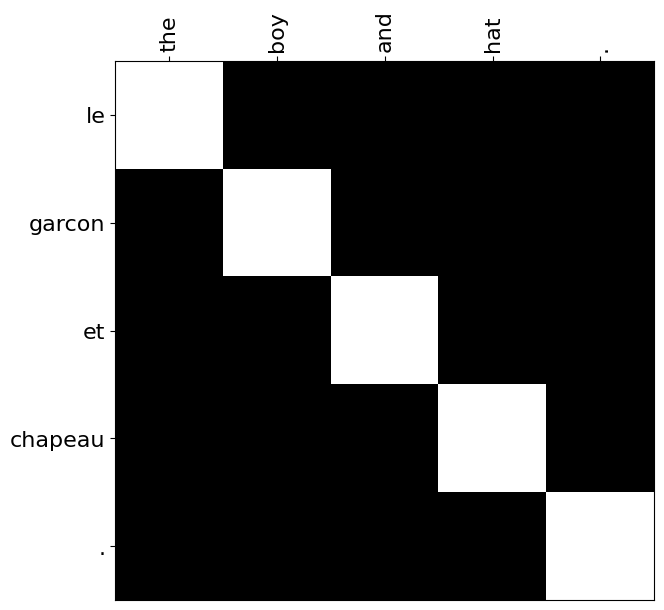

In [58]:
# Visualize weights to check for alignment
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(alignment, cmap='gray')
ax.xaxis.tick_top()
ax.set_xticks(np.arange(alignment.shape[1]))
ax.set_xticklabels(sentence_en.split(" "), rotation=90, size=16);
ax.set_yticks(np.arange(alignment.shape[0]));
ax.set_yticklabels(sentence_fr.split(" "), size=16);

In [38]:
en_word = 'bed'
nearest_fr_word, max_dot = find_nearest_fr_word(en_word, en_words, en_embeddings, fr_words, fr_embeddings)
print('nearest_fr_word to', en_word, 'is', nearest_fr_word, "with dot:", max_dot)

nearest_fr_word to bed is lit with dot: 0.3843656600000001


In [36]:
fr_words.get('the')

63

In [ ]:
the bed and the hat